<a href="https://colab.research.google.com/github/manaswini294/ToDo-List/blob/main/SCT_Task1_House_Price_Prediction_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    str

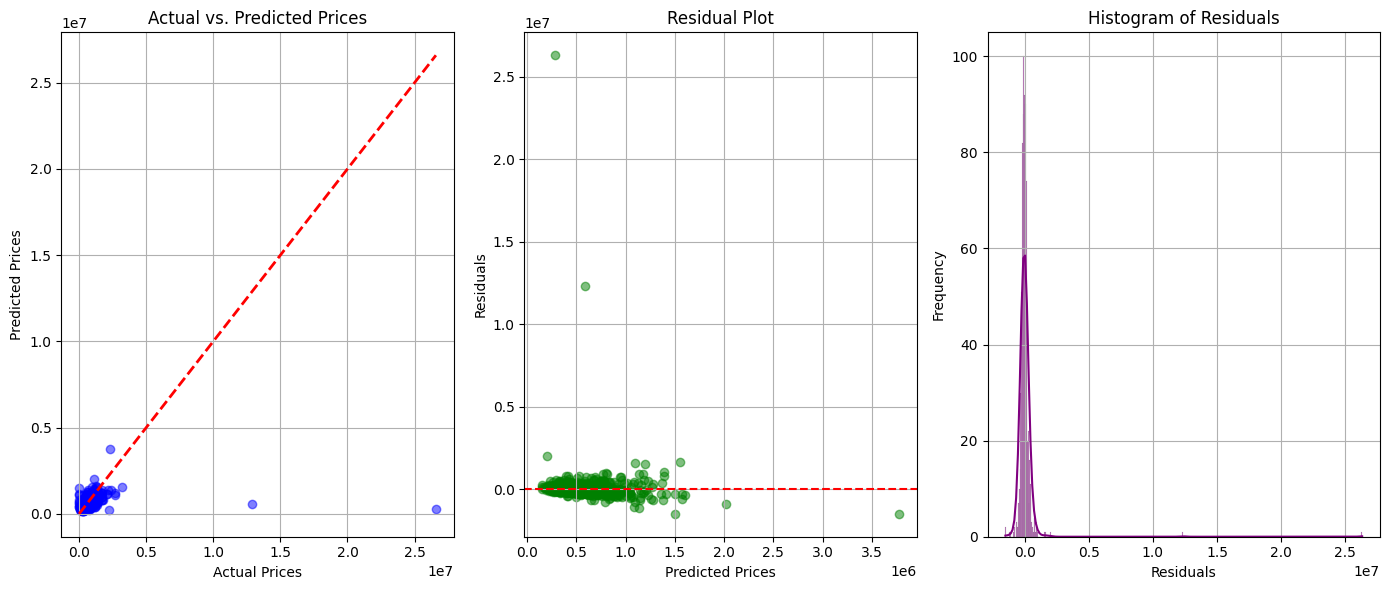


Predictions for New Data:
House 1: Predicted Price = $375710.13
House 2: Predicted Price = $462835.95


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv("/content/House.csv")

# Display the first few rows of the dataframe
print(data.head())

# Feature selection
# We are only interested in sqft_living, bedrooms, and bathrooms for prediction
features = ['sqft_living', 'bedrooms', 'bathrooms']
X = data[features]
y = data['price']

# Handle missing values by dropping rows with NaNs
X = X.dropna()
y = y[X.index]  # Ensure y matches the cleaned X

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Display Actual vs. Predicted Prices
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nActual vs. Predicted Prices:")
print(comparison_df.head())

# Plot actual vs. predicted prices
plt.figure(figsize=(14, 6))

# Scatter Plot
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.grid(True)

# Residual Plot
residuals = y_test - y_pred
plt.subplot(1, 3, 2)
plt.scatter(y_pred, residuals, alpha=0.5, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)

# Histogram of Residuals
plt.subplot(1, 3, 3)
sns.histplot(residuals, kde=True, color='purple')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(True)

plt.tight_layout()
plt.show()

# Example: Predict prices for new data
new_data = pd.DataFrame({
    'sqft_living': [1500, 2000],
    'bedrooms': [3, 4],
    'bathrooms': [2, 3]
})
new_predictions = model.predict(new_data)
print("\nPredictions for New Data:")
for i, pred in enumerate(new_predictions):
    print(f"House {i+1}: Predicted Price = ${pred:.2f}")
